In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
df = pd.read_csv("train_house.csv")

df.drop("Id", axis=1, inplace=True)
df.fillna(0, inplace=True)

df = pd.get_dummies(df)
df = df.astype(float)   

X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

print("MAE :", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R2  :", round(r2, 4))

MAE : 18329.5
RMSE: 28174.95
R2  : 0.8867


In [18]:
#Compare actual vs predicted
results = pd.DataFrame({
    "Actual Price": y_test,
    "Predicted Price": pred
})
print(results.head())

      Actual Price  Predicted Price
892       154500.0    158814.800349
1105      325000.0    343701.240010
413       115000.0     91186.417167
522       159000.0    184772.547352
1036      315500.0    333612.495729


In [20]:
#Load dataset
import pandas as pd
df = pd.read_csv("customer_purchase_behavior.csv")
print(df.head())

   CustomerID  Recency  Purchase_Frequency  Monetary_Value  Avg_Order_Value
0           1      103                  14            1667             4343
1           2      349                  21           27692             3844
2           3      271                  48            1562             4632
3           4      107                  20           19040             2255
4           5       72                   8           24744             4920


In [21]:
#Select purchase behaviour features
X = df[['Recency', 'Purchase_Frequency', 'Monetary_Value', 'Avg_Order_Value']]

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

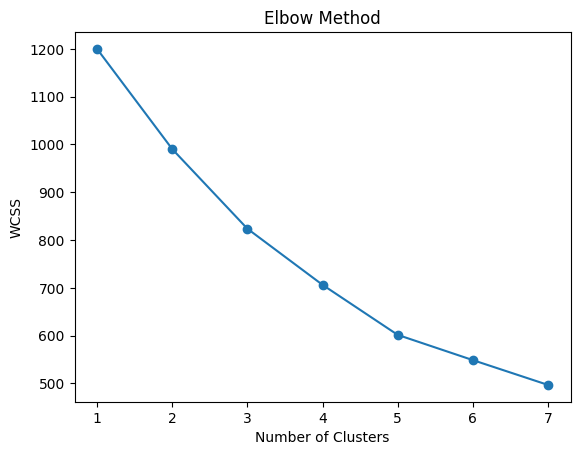

In [23]:
#Find best number of clusters
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,8), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
#Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [26]:
#View clustered customers
print(df.head())

   CustomerID  Recency  Purchase_Frequency  Monetary_Value  Avg_Order_Value  \
0           1      103                  14            1667             4343   
1           2      349                  21           27692             3844   
2           3      271                  48            1562             4632   
3           4      107                  20           19040             2255   
4           5       72                   8           24744             4920   

   Cluster  
0        1  
1        0  
2        0  
3        1  
4        1  
